In [1]:
library(tidyverse)
library(dplyr)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'stringr' was built under R version 3.6.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [3]:
#LOAD THIS PART AGAIN WHEN YOU CHANGE THE STRATEGY, TO RESET ALL DATAFRAME VARIABLES.
IBM   <- read.csv('IBM.csv')
MSFT  <- read.csv('msft.csv')
GOOG  <- read.csv('goog.csv')
AAPL  <- read.csv('aapl.csv')
AMZN  <- read.csv('amzn.csv')
FB    <- read.csv('fb.csv')
SAP   <- read.csv('SAP.csv')
TSLA  <- read.csv('TSLA.csv')
NFLX  <- read.csv('NFLX.csv')
ORCL  <- read.csv('ORCL.csv')
USD2JPY <- read.csv('USD_JPY_2018.csv')

In [4]:
Calculations=data.frame(Date=1:251,c(0),c(0),c(0))
colnames(Calculations)<-c("Date","MTM","HighTechIndex","Temp_Divdident")

In [5]:
Universe = data.frame(Date=1:251,IBM_Close=IBM$Close,IBM_Adj.Close=IBM$Adj.Close,MSFT_Close=MSFT$Close,MSFT_Adj.Close=MSFT$Adj.Close,GOOG_Close=GOOG$Close,GOOG_Adj.Close=GOOG$Adj.Close,AAPL_Close=AAPL$Close,AAPL_Adj.Close=AAPL$Adj.Close,AMZN_Close=AMZN$Close,AMZN_Adj.Close=AMZN$Adj.Close,FB_Close=FB$Close,FB_Adj.Close=FB$Adj.Close,NFLX_Close=NFLX$Close,NFLX_Adj.Close=NFLX$Adj.Close,TSLA_Close=TSLA$Close,TSLA_Adj.Close=TSLA$Adj.Close,ORCL_Close=ORCL$Close,ORCL_Adj.Close=ORCL$Adj.Close,SAP_Close=SAP$Close,SAP_Adj.Close=SAP$Adj.Close)
row.names(Universe)<-1:251

In [6]:
Calculations$HighTechIndex = rowMeans(Universe[,c(2,4,6,8,10,12,14,16,18,20)])

In [7]:
CurrentHolding<-data.frame(c('IBM','MSFT','GOOG','AAPL','AMZN','FB','NFLX','TSLA','ORCL','SAP'),c(0),c(0))
colnames(CurrentHolding)<-c("Name","Quantity","ChangeinPercent")
CurrentCash = 5000000

In [8]:
print(CurrentHolding)

   Name Quantity ChangeinPercent
1   IBM        0               0
2  MSFT        0               0
3  GOOG        0               0
4  AAPL        0               0
5  AMZN        0               0
6    FB        0               0
7  NFLX        0               0
8  TSLA        0               0
9  ORCL        0               0
10  SAP        0               0


# CODE FOR HIGH REBALANCING STRATEGY

In [10]:
#CODE FOR HIGH REBALANCING STRATEGY

for (i in seq(1, 251, by=5)){
  j=i
  l=i
  CurrentDate <- i
  
  for (val in CurrentHolding$Name[1:5]){
    #SELL
    colname <- paste(val,'_Close',sep = "")
    CurrentCash<-CurrentCash+(Universe[Universe$Date ==CurrentDate,match(colname,names(Universe))])*(CurrentHolding$Quantity[CurrentHolding$Name==val])
    CurrentHolding$Quantity[CurrentHolding$Name==val] <- 0
  }
  
  if (CurrentDate>5) {
    
    for (value in CurrentHolding$Name) {
      #Rebalancing
      colname <- paste(value,'_Adj.Close',sep="")
      CurrentHolding$ChangeinPercent[CurrentHolding$Name==value] <- ( (Universe[Universe$Date==CurrentDate,match(colname,names(Universe))]) - (Universe[Universe$Date==CurrentDate-5,match(colname,names(Universe))]) ) / (Universe[Universe$Date==CurrentDate-5,match(colname,names(Universe))]) * 100
    }
  }
  
  CurrentHolding <- CurrentHolding[order(-CurrentHolding$ChangeinPercent),]
  chillar=0
  CashforeachStock<-CurrentCash/5
  CurrentCash=0
  
  for(val in CurrentHolding$Name[1:5]){
    #BUY
    colname <- paste(val,'_Close',sep="")
    CurrentHolding$Quantity[CurrentHolding$Name==val] = CashforeachStock %/% (Universe[Universe$Date == CurrentDate,match(colname,names(Universe))])
    chillar <- CashforeachStock %% (Universe[Universe$Date == CurrentDate,match(colname,names(Universe))])
    CurrentCash <- chillar+CurrentCash
  }

  if(i<246){
    for(l in seq(l,l+4, by=1)){
      for(valu in CurrentHolding$Name[1:5]){
        colname1 <- paste(valu,'_Close',sep="")
        Calculations$MTM[Calculations$Date==l]=Calculations$MTM[Calculations$Date==l]+Universe[Universe$Date==l,match(colname1,names(Universe))]*(CurrentHolding$Quantity[CurrentHolding$Name==valu])
      }
    }
    Calculations$MTM[Calculations$Date==j]=Calculations$MTM[Calculations$Date==j]+CurrentCash
    for (j in seq(j+1,j+5, by=1)) {
      CurrentDate=j
      for(valu in CurrentHolding$Name[1:5]){
        #print(CurrentHolding$Name[1:3])
        colname1 <- paste(valu,'_Close',sep="")
        colname2 <- paste(valu,'_Adj.Close',sep="")
        Calculations$Temp_Divdident[Calculations$Date==j] = round( Universe[Universe$Date==CurrentDate,match(colname1,names(Universe))] * abs((Universe[Universe$Date==CurrentDate-1,match(colname2,names(Universe))]) / (Universe[Universe$Date==CurrentDate,match(colname2,names(Universe))])  - (Universe[Universe$Date==CurrentDate-1,match(colname1,names(Universe))]) / (Universe[Universe$Date==CurrentDate,match(colname1,names(Universe))]) ) , digits =2 )
        CurrentCash=CurrentCash+Calculations$Temp_Divdident[Calculations$Date==j]*(CurrentHolding$Quantity[CurrentHolding$Name==valu]) 
        if(Calculations$Temp_Divdident[Calculations$Date==j]>0.2){
          print(paste("You got a divident of", Calculations$Temp_Divdident[Calculations$Date==j] *(CurrentHolding$Quantity[CurrentHolding$Name==valu]),"dollors for",valu,"'s",(CurrentHolding$Quantity[CurrentHolding$Name==valu]),"shares"))
        }
      }
    }
  }
  if(i==246){
    for(l in seq(246,251, by=1)){
      z = c(Universe$IBM_Close,Universe$MSFT_Close,Universe$GOOG_Close,Universe$AAPL_Close,Universe$AMZN_Close,Universe$FB_Close, Universe$NFLX_Close, Universe$TSLA_Close, Universe$ORCL_Close, Universe$SAP_Close)
      for(valu in CurrentHolding$Name[1:5]){
        colname1 <- paste(valu,'_Close',sep="")
        Calculations$MTM[Calculations$Date==l]=Calculations$MTM[Calculations$Date==l]+Universe[Universe$Date==l,match(colname1,names(Universe))]*(CurrentHolding$Quantity[CurrentHolding$Name==valu])
      }
    }
    Calculations$MTM[Calculations$Date==l]=Calculations$MTM[Calculations$Date==l]+CurrentCash
    
    for(j in seq(247,251, by=1)) {
      for(valu in CurrentHolding$Name[1:5]){
        colname1 <- paste(valu,'_Close',sep="")
        colname2 <- paste(valu,'_Adj.Close',sep="")
        Calculations$Temp_Divdident[Calculations$Date==j] = round( Universe[Universe$Date==CurrentDate,match(colname1,names(Universe))] * abs((Universe[Universe$Date==CurrentDate-1,match(colname2,names(Universe))]) / (Universe[Universe$Date==CurrentDate,match(colname2,names(Universe))])  - (Universe[Universe$Date==CurrentDate-1,match(colname1,names(Universe))]) / (Universe[Universe$Date==CurrentDate,match(colname1,names(Universe))]) ) , digits =2 )
        CurrentCash=CurrentCash+Calculations$Temp_Divdident[Calculations$Date==j]*(CurrentHolding$Quantity[CurrentHolding$Name==valu])
     }
    }
   } 
}



[1] "You got a divident of 4287.15 dollors for AAPL 's 6805 shares"
[1] "You got a divident of 4369.05 dollors for AAPL 's 5985 shares"
[1] "You got a divident of 4895.52 dollors for MSFT 's 11656 shares"
[1] "You got a divident of 4496.07 dollors for AAPL 's 6159 shares"
[1] "You got a divident of 4799.76 dollors for MSFT 's 11428 shares"
[1] "You got a divident of 14244.61 dollors for IBM 's 9073 shares"
[1] "You got a divident of 4653.82 dollors for MSFT 's 10117 shares"


In [11]:
print(CurrentHolding)
#Final Sell on last day of the year
for (val in CurrentHolding$Name[1:5]){
  #SELL
  colname <- paste(val,'_Close',sep = "")
  CurrentCash<-CurrentCash+(Universe[Universe$Date ==CurrentDate,match(colname,names(Universe))])*(CurrentHolding$Quantity[CurrentHolding$Name==val])
  CurrentHolding$Quantity[CurrentHolding$Name==val] <- 0
}


   Name Quantity ChangeinPercent
5  AMZN      646        9.039894
7  NFLX     3629        8.632658
3  GOOG      938        5.724116
6    FB     7410        4.913965
4  AAPL     6158        4.650717
8  TSLA        0        4.074804
10  SAP        0        3.546915
2  MSFT        0        3.400177
9  ORCL        0        2.613634
1   IBM        0        2.460782


[1] "After High Rebalancing strategy you have 4857072.855778 DOLLARS"


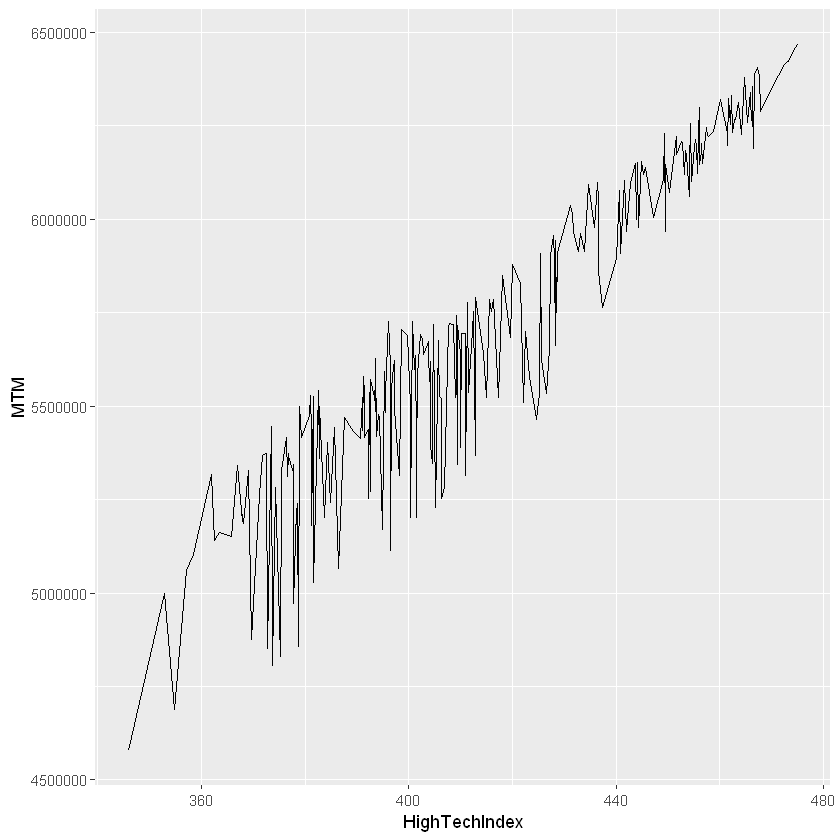

In [12]:
print(paste("After High Rebalancing strategy you have",CurrentCash,"DOLLARS"))
ggplot(Calculations, aes(HighTechIndex,MTM)) + geom_line()
#USD to JPY Calculation 
high <- list(unlist(Calculations$MTM)*unlist(USD2JPY$value))


# CODE FOR LOW REBALANCING STRATEGY


In [13]:
for (i in seq(1, 251, by=5)){
  j=i
  l=i
  CurrentDate <- i
  
  for (val in CurrentHolding$Name[1:5]){
    #SELL
    colname <- paste(val,'_Close',sep = "")
    CurrentCash<-CurrentCash+(Universe[Universe$Date ==CurrentDate,match(colname,names(Universe))])*(CurrentHolding$Quantity[CurrentHolding$Name==val])
    CurrentHolding$Quantity[CurrentHolding$Name==val] <- 0
  }
  
  if (CurrentDate>5) {
    
    for (value in CurrentHolding$Name) {
      #Rebalancing
      colname <- paste(value,'_Adj.Close',sep="")
      CurrentHolding$ChangeinPercent[CurrentHolding$Name==value] <- ( (Universe[Universe$Date==CurrentDate,match(colname,names(Universe))]) - (Universe[Universe$Date==CurrentDate-5,match(colname,names(Universe))]) ) / (Universe[Universe$Date==CurrentDate-5,match(colname,names(Universe))]) * 100
    }
  }
  
  CurrentHolding <- CurrentHolding[order(CurrentHolding$ChangeinPercent),]
  chillar=0
  CashforeachStock<-CurrentCash/5
  CurrentCash=0
  
  for(val in CurrentHolding$Name[1:5]){
    #BUY
    colname <- paste(val,'_Close',sep="")
    CurrentHolding$Quantity[CurrentHolding$Name==val] = CashforeachStock %/% (Universe[Universe$Date == CurrentDate,match(colname,names(Universe))])
    chillar <- CashforeachStock %% (Universe[Universe$Date == CurrentDate,match(colname,names(Universe))])
    CurrentCash <- chillar+CurrentCash
  }

  if(i<246){
    for(l in seq(l,l+4, by=1)){
      for(valu in CurrentHolding$Name[1:5]){
        colname1 <- paste(valu,'_Close',sep="")
        Calculations$MTM[Calculations$Date==l]=Calculations$MTM[Calculations$Date==l]+Universe[Universe$Date==l,match(colname1,names(Universe))]*(CurrentHolding$Quantity[CurrentHolding$Name==valu])
      }
    }
    Calculations$MTM[Calculations$Date==j]=Calculations$MTM[Calculations$Date==j]+CurrentCash
    for (j in seq(j+1,j+5, by=1)) {
      CurrentDate=j
      for(valu in CurrentHolding$Name[1:5]){
        colname1 <- paste(valu,'_Close',sep="")
        colname2 <- paste(valu,'_Adj.Close',sep="")
        Calculations$Temp_Divdident[Calculations$Date==j] = round( Universe[Universe$Date==CurrentDate,match(colname1,names(Universe))] * abs((Universe[Universe$Date==CurrentDate-1,match(colname2,names(Universe))]) / (Universe[Universe$Date==CurrentDate,match(colname2,names(Universe))])  - (Universe[Universe$Date==CurrentDate-1,match(colname1,names(Universe))]) / (Universe[Universe$Date==CurrentDate,match(colname1,names(Universe))]) ) , digits =2 )
        CurrentCash=CurrentCash+Calculations$Temp_Divdident[Calculations$Date==j]*(CurrentHolding$Quantity[CurrentHolding$Name==valu]) 
        if(Calculations$Temp_Divdident[Calculations$Date==j]>0.2){
          print(paste("You got a divident of", Calculations$Temp_Divdident[Calculations$Date==j] *(CurrentHolding$Quantity[CurrentHolding$Name==valu]),"dollors for",valu,"'s",(CurrentHolding$Quantity[CurrentHolding$Name==valu]),"shares"))
        }
      }
    }
  }
  if(i==246){
    for(l in seq(246,251, by=1)){
      z = c(Universe$IBM_Close,Universe$MSFT_Close,Universe$GOOG_Close,Universe$AAPL_Close,Universe$AMZN_Close,Universe$FB_Close, Universe$NFLX_Close, Universe$TSLA_Close, Universe$ORCL_Close, Universe$SAP_Close)
      for(valu in CurrentHolding$Name[1:5]){
        colname1 <- paste(valu,'_Close',sep="")
        Calculations$MTM[Calculations$Date==l]=Calculations$MTM[Calculations$Date==l]+Universe[Universe$Date==l,match(colname1,names(Universe))]*(CurrentHolding$Quantity[CurrentHolding$Name==valu])
      }
    }
    Calculations$MTM[Calculations$Date==l]=Calculations$MTM[Calculations$Date==l]+CurrentCash
    
    for(j in seq(247,251, by=1)) {
      for(valu in CurrentHolding$Name[1:5]){
        colname1 <- paste(valu,'_Close',sep="")
        colname2 <- paste(valu,'_Adj.Close',sep="")
        Calculations$Temp_Divdident[Calculations$Date==j] = round( Universe[Universe$Date==CurrentDate,match(colname1,names(Universe))] * abs((Universe[Universe$Date==CurrentDate-1,match(colname2,names(Universe))]) / (Universe[Universe$Date==CurrentDate,match(colname2,names(Universe))])  - (Universe[Universe$Date==CurrentDate-1,match(colname1,names(Universe))]) / (Universe[Universe$Date==CurrentDate,match(colname1,names(Universe))]) ) , digits =2 )
        CurrentCash=CurrentCash+Calculations$Temp_Divdident[Calculations$Date==j]*(CurrentHolding$Quantity[CurrentHolding$Name==valu])
     }
    }
   } 
}

[1] "You got a divident of 9612 dollors for IBM 's 6408 shares"
[1] "You got a divident of 4620.42 dollors for MSFT 's 11001 shares"
[1] "You got a divident of 11384.07 dollors for IBM 's 7251 shares"
[1] "You got a divident of 15851.99 dollors for SAP 's 9163 shares"
[1] "You got a divident of 12189.48 dollors for IBM 's 7764 shares"
[1] "You got a divident of 3990.18 dollors for AAPL 's 5466 shares"


In [14]:
print(CurrentHolding)
#Final Sell on last day of the year
for (val in CurrentHolding$Name[1:5]){
  #SELL
  colname <- paste(val,'_Close',sep = "")
  CurrentCash<-CurrentCash+(Universe[Universe$Date ==CurrentDate,match(colname,names(Universe))])*(CurrentHolding$Quantity[CurrentHolding$Name==val])
  CurrentHolding$Quantity[CurrentHolding$Name==val] <- 0
}

   Name Quantity ChangeinPercent
1   IBM     9203        2.460782
9  ORCL    23171        2.613634
2  MSFT    10300        3.400177
10  SAP    10509        3.546915
8  TSLA     3143        4.074804
4  AAPL        0        4.650717
6    FB        0        4.913965
3  GOOG        0        5.724116
7  NFLX        0        8.632658
5  AMZN        0        9.039894


[1] "After LOW Rebalancing strategy you have 5230969.64234599 DOLLARS"


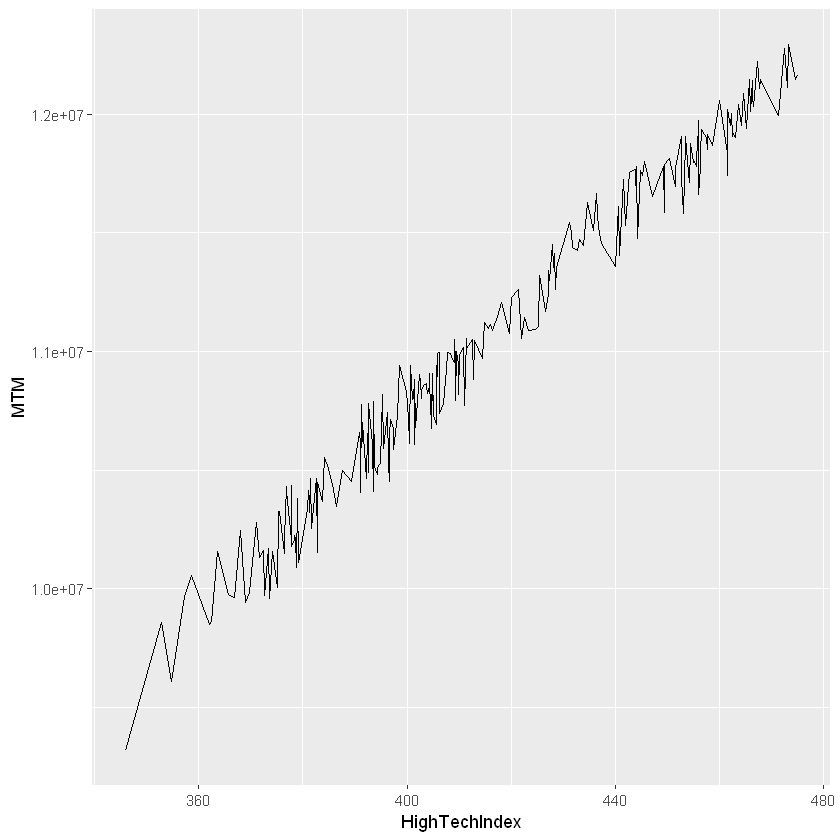

In [15]:
print(paste("After LOW Rebalancing strategy you have",CurrentCash,"DOLLARS"))
ggplot(Calculations, aes(HighTechIndex,MTM)) + geom_line()

# USD to JPY Calculation

In [21]:
low <- list(unlist(Calculations$MTM)*unlist(USD2JPY$value))